## Cats vs. Penguins vs. Bears

This file is available at <http://github.com/CloudAdvocacy/aijourney>

Let's pretend we have a bunch of photographs from North and South Pole, and we want to automatically sort them out by animals on the picture. We will also assume that we have some photographs of our cat, which we want to sort out.

To do this, we will need **image classification model**.

![Bear](data/bear/bear.0.jpg) | ![Penguin](data/peng/peng.0.jpg) | ![Cat](data/cat/cat.0.jpg)
-----------------------|----------------------------|-------------------
A Bear                  | A Penguin | A Cat

We will use **TensorFlow** framework for Neural Networks, and it's simple **Keras API**. If you want to learn more - there is great [TensorFlow Learning Path](http://aka.ms/learntf) at Microsoft Learn. It is also one of the two frameworks covered in our [AI for Beginners Curriculum](http://aka.ms/ai-beginners)

In [ ]:
import os
# Disable TensorFlow warning
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from IPython.display import clear_output

We will also define a function to display a bunch of images:

In [ ]:
def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

### Using pre-trained CNN

First, let's load the pre-trained network:

In [ ]:
vgg = keras.applications.VGG16(weights='imagenet',include_top=True)

Let's load the dataset and apply the network to the first few images:

In [ ]:
data = keras.preprocessing.image_dataset_from_directory('data',image_size=(224,224),batch_size=5)
img = list(data)[0][0]

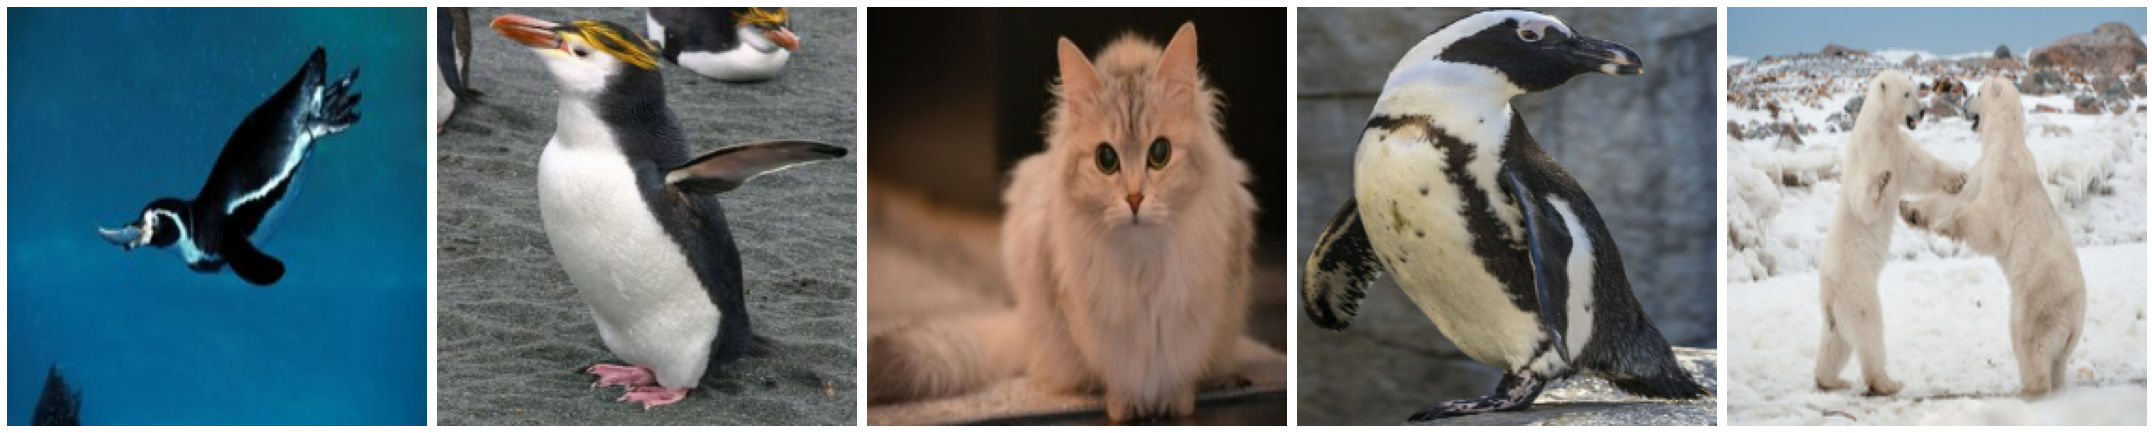

In [78]:
display_images(tf.cast(img,tf.int32))

In [79]:
decode_predictions(vgg.predict(preprocess_input(img)))

[[('n01494475', 'hammerhead', 0.38439044),
  ('n02077923', 'sea_lion', 0.21809468),
  ('n01484850', 'great_white_shark', 0.10920099),
  ('n02071294', 'killer_whale', 0.10001037),
  ('n01491361', 'tiger_shark', 0.029336246)],
 [('n02056570', 'king_penguin', 0.99783933),
  ('n01847000', 'drake', 0.0020161802),
  ('n02058221', 'albatross', 0.00010986715),
  ('n01855672', 'goose', 2.21688e-05),
  ('n01843383', 'toucan', 3.196004e-06)],
 [('n02123394', 'Persian_cat', 0.3948174),
  ('n02127052', 'lynx', 0.056405965),
  ('n02124075', 'Egyptian_cat', 0.048582662),
  ('n02342885', 'hamster', 0.038229495),
  ('n02123045', 'tabby', 0.036828008)],
 [('n02056570', 'king_penguin', 0.3872611),
  ('n01855672', 'goose', 0.38089773),
  ('n01582220', 'magpie', 0.1055657),
  ('n01847000', 'drake', 0.0486505),
  ('n02447366', 'badger', 0.019193433)],
 [('n02134084', 'ice_bear', 0.91418606),
  ('n02114548', 'white_wolf', 0.019939931),
  ('n02120079', 'Arctic_fox', 0.012759281),
  ('n02111500', 'Great_Pyrene

And here are all top predictions for all images in the dataset:

In [80]:
d = { 0 : [], 1: [], 2: [] }
for x,y in data:
    xp = preprocess_input(x)
    res = vgg.predict(xp)
    pred = decode_predictions(res,top=1)
    for xi,yi in zip(pred,y):
        d[int(yi)].append(xi[0][1])

for cls in range(3):
    print(f"Class {cls}: {', '.join(d[cls])}")

Class 0: ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear, ice_bear
Class 1: Siamese_cat, Egyptian_cat, tabby, Egyptian_cat, tiger_cat, Persian_cat, Egyptian_cat, tabby, Egyptian_cat, tabby, wallaby, tabby, Siamese_cat, Persian_cat, Egyptian_cat, Siberian_husky, Egyptian_cat, tabby, tiger_cat, Egyptian_cat, Siamese_cat, Egyptian_cat, Chihuahua, Egyptian_cat, Ibizan_hound, Arctic_fox, tabby, tabby
Class 2: king_penguin, king_penguin, king_penguin, hammerhead, king_penguin, king_penguin, king_penguin, king_penguin, king_penguin, king_penguin, king_penguin, king_penguin, king_penguin, king_penguin, king_penguin, king_penguin, oystercatcher, badger, king_penguin, king_penguin, king_penguin, king_penguin, bighorn, king_penguin, king_penguin, king_penguin,

### Visualizing VGG

Let's look at our CNN architecture:

In [81]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

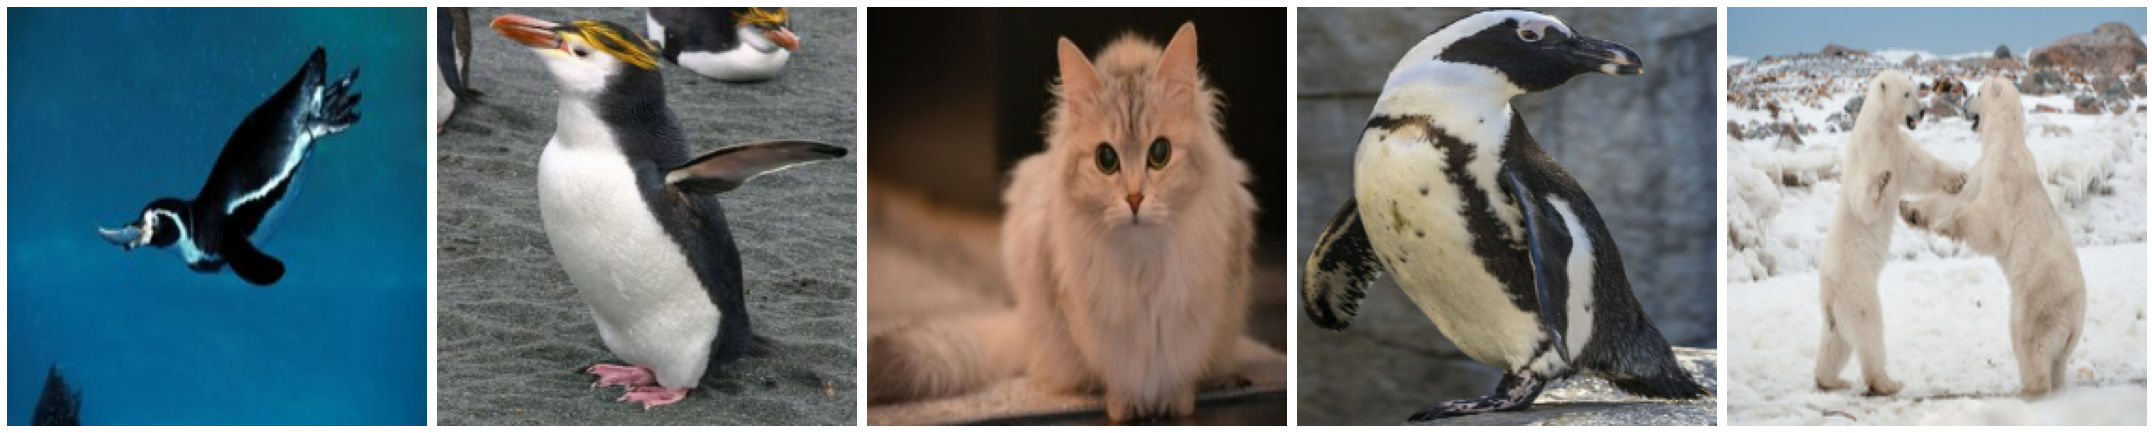

In [82]:
display_images(tf.cast(img,tf.int32))

In [83]:
layers = ['block1_conv1', 'block4_conv1', 'block5_conv3']
layer_outputs = [ vgg.get_layer(n).output for n in layers ]
activation_model = keras.models.Model(inputs=vgg.input, outputs=layer_outputs)
out = activation_model(keras.applications.vgg16.preprocess_input(img))

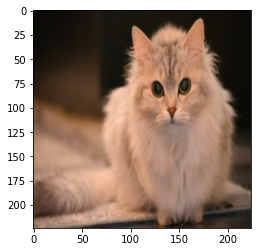

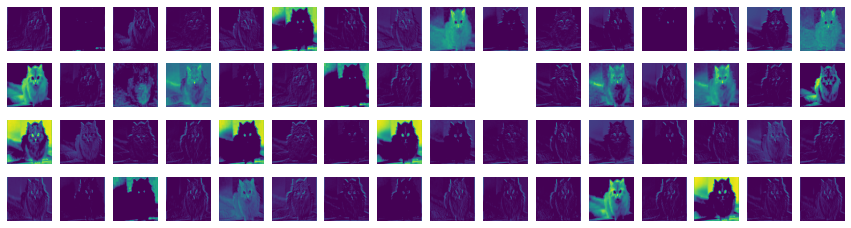

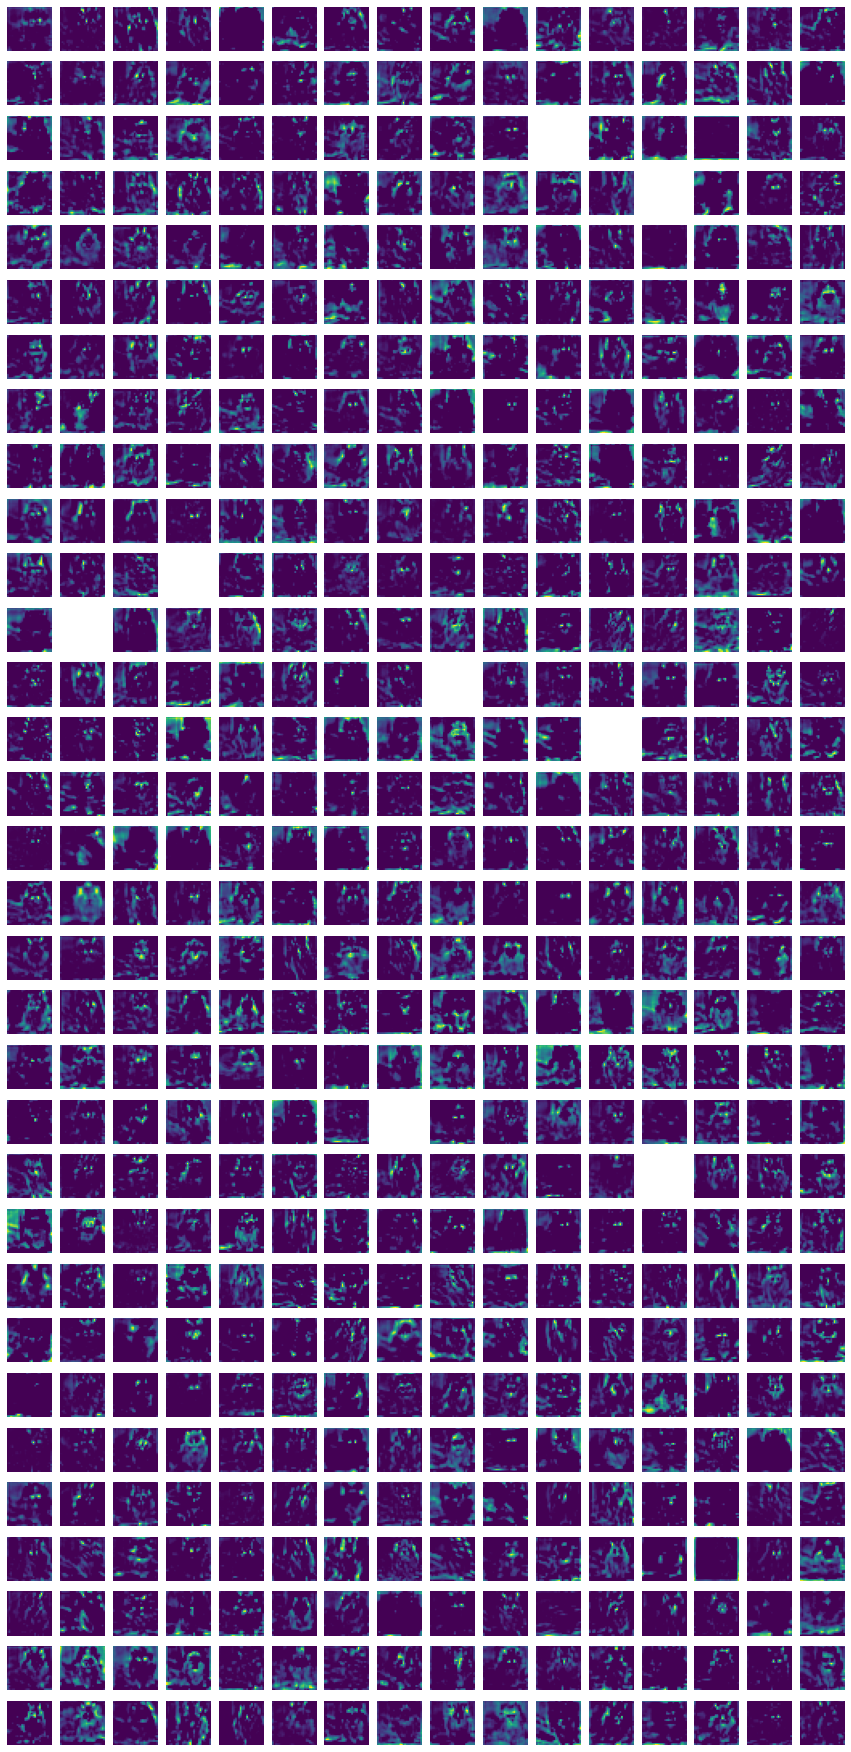

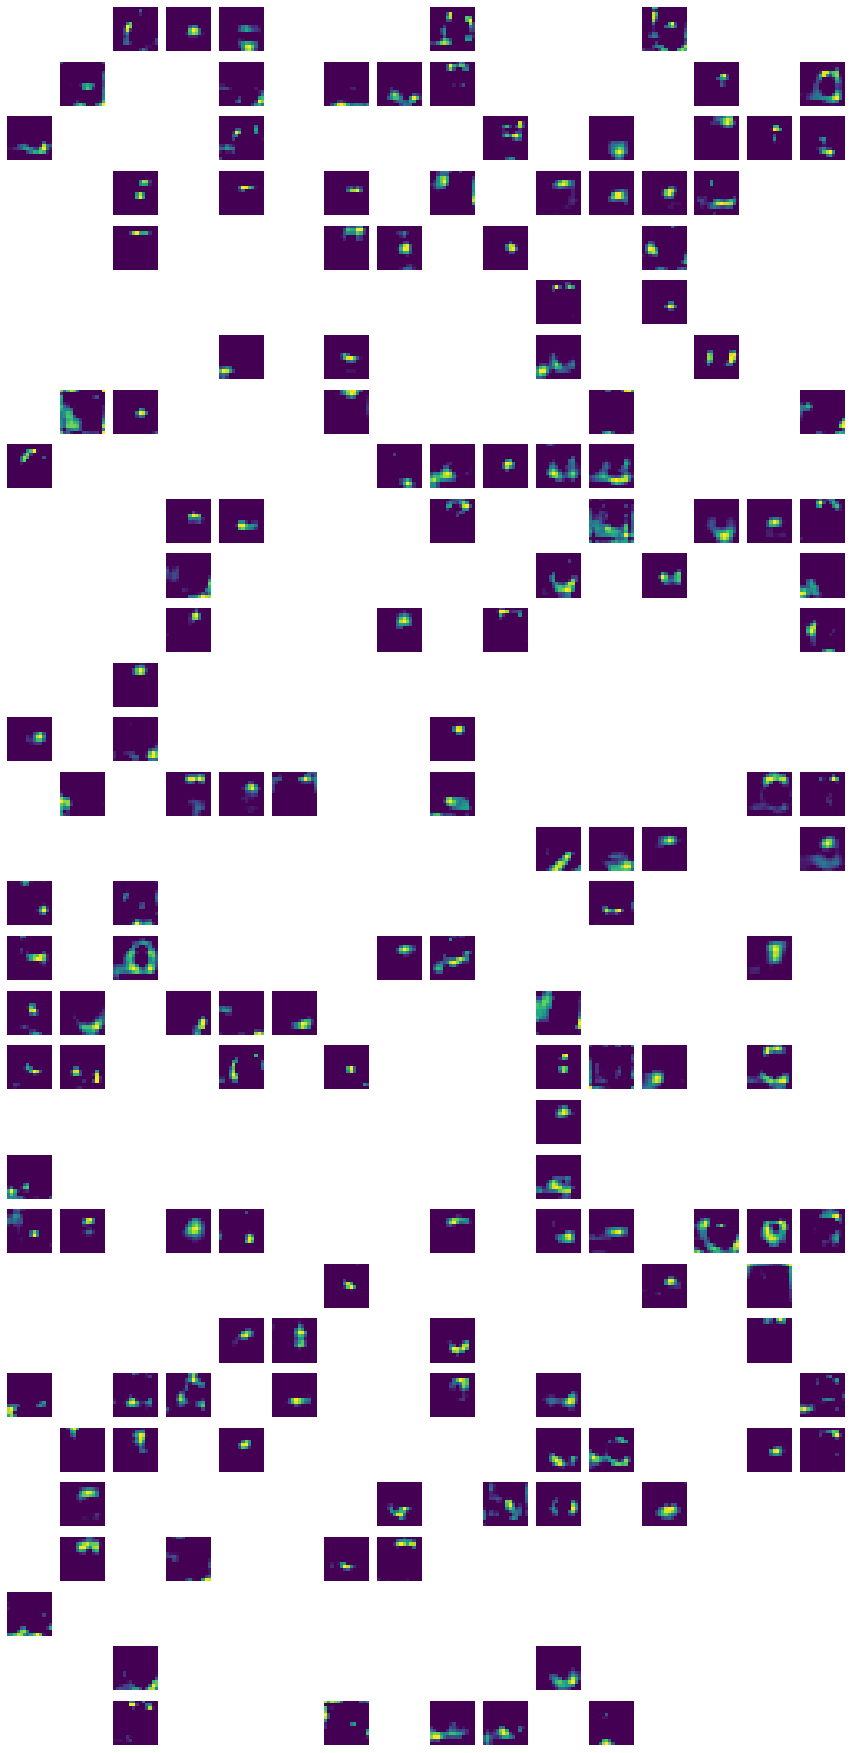

In [84]:
def normalize(img):
    return (img-tf.reduce_min(img))/(tf.reduce_max(img)-tf.reduce_min(img))

n_image = 2
width = 16

plt.imshow(normalize(img[n_image]))
# 
for o in out:
    n_filters = o.shape[-1]
    height = n_filters//width
    fig,ax = plt.subplots(height,width,figsize=(15,height))
    on = normalize(o[n_image])
    for i in range(n_filters):
        if np.linalg.norm(on[:,:,i].numpy())>0.2:
            ax[i//width,i%width].imshow(on[:,:,i],cmap='viridis')
        ax[i//width,i%width].axis('off')
    plt.show()

## How does an ideal cat looks like?

We can try to get the picture of an "ideal cat", by changing the input image in such a way as to maximize probability of this image being a cat. We will use gradient descent technique to adjust the image, starting from a random noise. We will also add special *total variation loss* function that will make the image smoother, but minimizing the distance between adjusting pixels. 

tf.Tensor([27.422112], shape=(1,), dtype=float32)


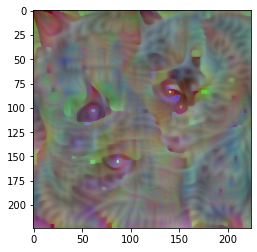

In [85]:
x = tf.Variable(tf.random.normal((1,224,224,3)))
# target = [284] # Siamese cat
for i in range(1000):
    with tf.GradientTape() as t:
        res = vgg(x)
        loss = 10*tf.reduce_mean(keras.metrics.sparse_categorical_crossentropy(target,res)) + \
               0.005*tf.image.total_variation(x)
        grads = t.gradient(loss,x)
        x.assign_sub(grads)
        if i%100 == 0:
            clear_output(wait=True)
            print(loss)
            plt.imshow(normalize(x[0]))
            plt.show()



### Feature Extraction

We can apply 'top' of the network (until the final classification layers) which will extract features from images and convert an image into a plain feature vector:

In [ ]:
vgg_extractor = keras.applications.VGG16(weights='imagenet',include_top=False)

for x,y in data:
    res = vgg_extractor.predict(preprocess_input(x))[0]
    print(res.shape)
    plt.imshow(res.reshape(-1,256))
    break

Now we can process all images in our dataset to extract feature vectors from them:

In [ ]:
processed = [(x,vgg_extractor.predict(preprocess_input(x)).reshape(-1,7*7*512),y) for x,y in data]
features = tf.concat([f for i,f,y in processed],axis=0)
labels = tf.concat([y for i,f,y in processed],axis=0)
images = tf.concat([i for i,f,y in processed],axis=0)
images = tf.cast(images,tf.int32)

In [86]:
print(features.shape)
print(labels)

(85, 25088)
tf.Tensor(
[2 1 0 1 2 1 2 1 1 2 0 2 0 1 1 1 0 2 1 0 2 1 2 2 0 0 0 2 0 0 2 0 2 0 0 0 0
 1 1 0 2 2 1 0 1 0 2 0 0 1 2 0 2 0 1 1 1 2 1 0 1 0 1 2 2 0 1 1 1 0 2 0 2 2
 2 0 1 1 1 0 2 0 2 1 2], shape=(85,), dtype=int32)


Feature vectors live in 25088-dimensional space, so we cannot easily visualize them. We can use special **dimension reduction** technique from classical machine learning, called [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis), or PCA. It will apply a transformation to out vectors that will reduce number of dimensions to 2 in such a way, that classes are most separable.

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(features)

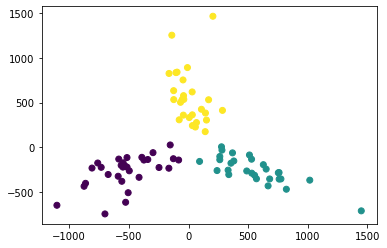

In [88]:
plt.scatter(res[:,0],res[:,1],c=labels)

We can easily display images that correspond to the leftmost and rightmost dots on this graph:

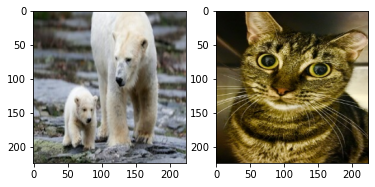

In [89]:
import numpy as np
ix1 = np.argmin(res[:,0])
ix2 = np.argmax(res[:,0])

fig,ax = plt.subplots(1,2)
ax[0].imshow(images[ix1])
ax[1].imshow(images[ix2])

Also, let's display images by going from left to right on the graph above. We will display every 5-th image in order to keep images visible. You can see that images corresponding to close vector values are indeed similar, and how they slowly change from one class to another.

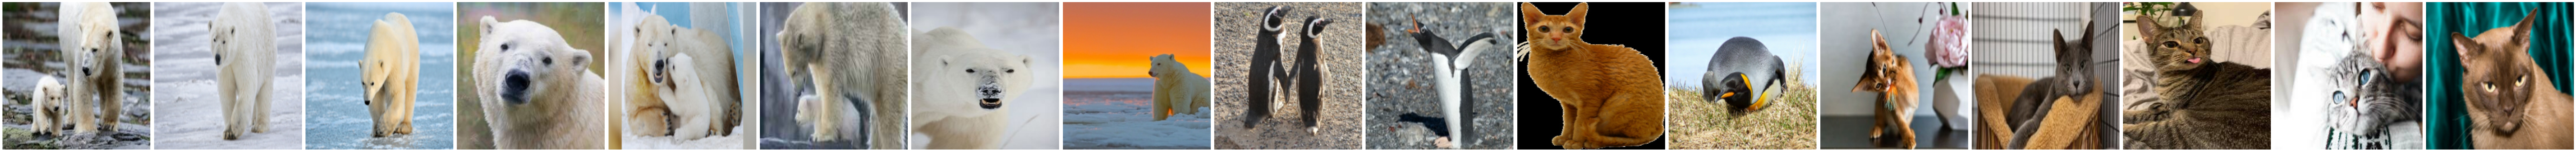

In [90]:
ar = [(im,x[0]) for im,x in zip (images,res)]
ar.sort(key=lambda x:x[1])
display_images([im for im,_ in ar[::5]])

## Takeaways

CNNs act as feature extractors, allowing us to convert images to feature vectors and further classify them. We can also use those vectors to group visually similar images together. To learn more about computer vision, visit:

* [Introduction to Computer Vision with TensorFlow](https://docs.microsoft.com/en-us/learn/paths/tensorflow-fundamentals/?WT.mc_id=academic-64902-dmitryso)
* [AI for Beginners Curriculim](http://aka.ms/ai-beginners)